<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(_1_2)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-1.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.2_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,35.933654,50.011231,73.709750,0.009741,169.664376,169.653913,0.010464
1,0.0,1.0,21.667503,43.052443,27.483823,-0.003413,102.200355,102.199410,0.000945
2,0.0,2.0,95.490728,89.671441,20.401421,-0.000426,215.563164,215.559952,0.003212
3,0.0,3.0,53.439540,69.223894,51.482093,0.006606,184.152134,184.143868,0.008266
4,0.0,4.0,57.982096,22.445286,71.699092,0.008186,162.134661,162.123682,0.010979
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,83.896345,91.722444,25.676530,-0.004434,211.290886,211.295428,-0.004542
29996,999.0,26.0,71.540093,86.973276,54.604046,-0.000664,223.116751,223.116790,-0.000039
29997,999.0,27.0,84.201863,47.653332,43.013969,0.014552,184.883716,184.870155,0.013560
29998,999.0,28.0,80.010971,87.524586,35.740988,-0.001118,213.275429,213.276475,-0.001047


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    35.933654  50.011231  73.709750  ...  169.664376  169.653913  0.010464
      1.0    21.667503  43.052443  27.483823  ...  102.200355  102.199410  0.000945
      2.0    95.490728  89.671441  20.401421  ...  215.563164  215.559952  0.003212
      3.0    53.439540  69.223894  51.482093  ...  184.152134  184.143868  0.008266
      4.0    57.982096  22.445286  71.699092  ...  162.134661  162.123682  0.010979
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   83.896345  91.722444  25.676530  ...  211.290886  211.295428 -0.004542
      26.0   71.540093  86.973276  54.604046  ...  223.116751  223.116790 -0.000039
      27.0   84.201863  47.653332  43.013969  ...  184.883716  184.870155  0.013560
      28.0   80.010971  87.524586  35.740988  ...  213.275429  213.276475 -0.001047
      29.0   26.696981  47.162400  30.505677  ...  114.353941  114.360638 -0.006697

[30000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    35.933654  50.011231  73.709750  ...  169.664376  169.653913  0.010464
      1.0    21.667503  43.052443  27.483823  ...  102.200355  102.199410  0.000945
      2.0    95.490728  89.671441  20.401421  ...  215.563164  215.559952  0.003212
      3.0    53.439540  69.223894  51.482093  ...  184.152134  184.143868  0.008266
      4.0    57.982096  22.445286  71.699092  ...  162.134661  162.123682  0.010979
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   83.896345  91.722444  25.676530  ...  211.290886  211.295428 -0.004542
      26.0   71.540093  86.973276  54.604046  ...  223.116751  223.116790 -0.000039
      27.0   84.201863  47.653332  43.013969  ...  184.883716  184.870155  0.013560
      28.0   80.010971  87.524586  35.740988  ...  213.275429  213.276475 -0.001047
      29.0   26.696981  47.162400  30.505677  ...  114.353941  114.360638 -0.006697

[30000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,35.933654,50.011231,73.709750,0.009741,169.664376,169.653913,0.010464
1,0.0,1.0,21.667503,43.052443,27.483823,-0.003413,102.200355,102.199410,0.000945
2,0.0,2.0,95.490728,89.671441,20.401421,-0.000426,215.563164,215.559952,0.003212
3,0.0,3.0,53.439540,69.223894,51.482093,0.006606,184.152134,184.143868,0.008266
4,0.0,4.0,57.982096,22.445286,71.699092,0.008186,162.134661,162.123682,0.010979
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,83.896345,91.722444,25.676530,-0.004434,211.290886,211.295428,-0.004542
29996,999.0,26.0,71.540093,86.973276,54.604046,-0.000664,223.116751,223.116790,-0.000039
29997,999.0,27.0,84.201863,47.653332,43.013969,0.014552,184.883716,184.870155,0.013560
29998,999.0,28.0,80.010971,87.524586,35.740988,-0.001118,213.275429,213.276475,-0.001047


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    35.933654  50.011231  73.709750  ...  169.664376  169.653913  0.010464
      1.0    21.667503  43.052443  27.483823  ...  102.200355  102.199410  0.000945
      2.0    95.490728  89.671441  20.401421  ...  215.563164  215.559952  0.003212
      3.0    53.439540  69.223894  51.482093  ...  184.152134  184.143868  0.008266
      4.0    57.982096  22.445286  71.699092  ...  162.134661  162.123682  0.010979
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   83.896345  91.722444  25.676530  ...  211.290886  211.295428 -0.004542
      26.0   71.540093  86.973276  54.604046  ...  223.116751  223.116790 -0.000039
      27.0   84.201863  47.653332  43.013969  ...  184.883716  184.870155  0.013560
      28.0   80.010971  87.524586  35.740988  ...  213.275429  213.276475 -0.001047
      29.0   26.696981  47.162400  30.505677  ...  114.353941  114.360638 -0.006697

[30000 rows x 7 columns]

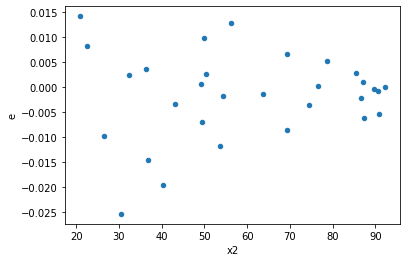

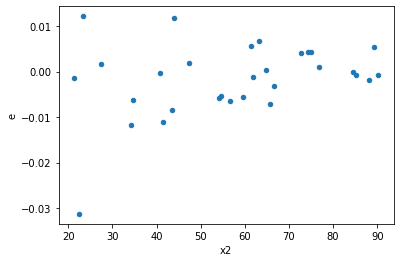

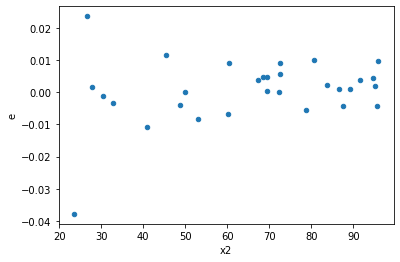

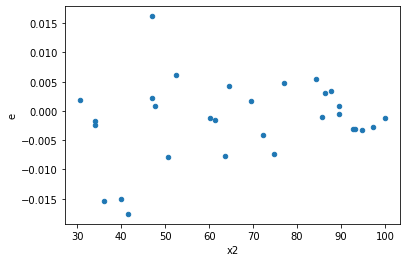

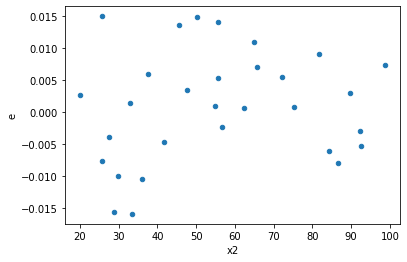

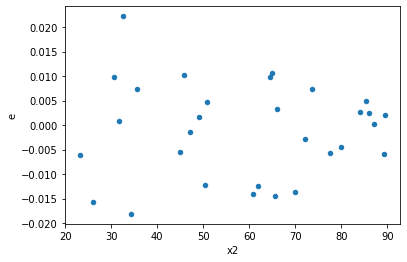

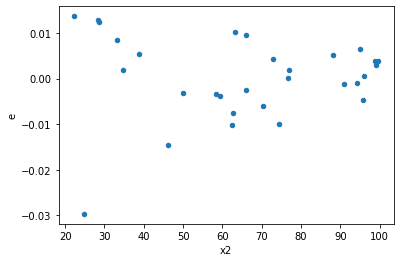

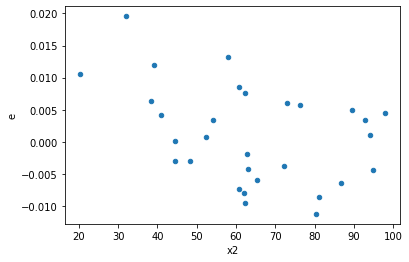

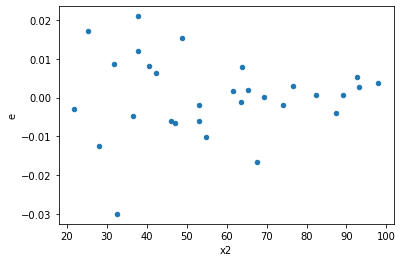

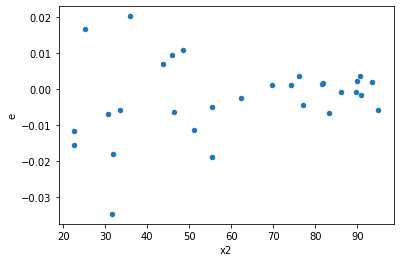

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]
    k_means = KMeans(n_clusters=2)
    model = k_means.fit(x)
    model

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = k_means.predict(x)
    y_kmeans

    # kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    data_sort_clusters = data_clusters.sort_values('clusters')
    data_sort_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster1 = data_sort_clusters[data_sort_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSR1 = model1.ssr
    MSE1 = model1.mse_resid

    # กลุ่มที่ 2
    data_cluster0 = data_sort_clusters[data_sort_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model0 = sm.OLS(y, x).fit()

    DF0 = model0.df_resid + 1
    SSR0 = model0.ssr
    MSE0 = model0.mse_resid

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSR1/DF1) / (SSR0/DF0)

    df1 = DF1
    df0 = DF0

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df0)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df0)
    
    return df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df0=[]
list_df1=[]
list_SSR0=[]
list_SSR1=[]
list_MSE0=[]
list_MSE1=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater=get_result(run_replicate)

    list_df0.append(df0)
    list_df1.append(df1)
    list_SSR0.append(SSR0)
    list_SSR1.append(SSR1)
    list_MSE0.append(MSE0)
    list_MSE1.append(MSE1)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,12.0,12.0,0.0001992403054932858,0.001865806087916168,1.8112755044844164e-05,0.0001696187352651062,9.364601621628431,0.00048491184024923584,0.9997575440798754,Reject001=0 : Heteroscedasticity
2.0,10.0,14.0,0.0008081114382828617,0.0013431174217095937,8.979015980920686e-05,0.00010331672474689183,1.1871748641177107,0.8006490447292252,0.5996754776353874,Reject001=1 : Homoscedasticity
3.0,14.0,10.0,0.00042010762102236886,0.0004801465766838617,3.231597084787453e-05,5.334961963154019e-05,1.60007858396269,0.40899483492998256,0.7955025825350087,Reject001=1 : Homoscedasticity
4.0,12.0,12.0,0.0006824647308987165,0.0009504273489086001,6.204224826351967e-05,8.64024862644182e-05,1.3926395106997136,0.5750742611832347,0.7124628694083827,Reject001=1 : Homoscedasticity
5.0,10.0,14.0,0.000383127679454716,0.0016272591682139667,4.256974216163511e-05,0.00012517378217030513,3.0337875325269272,0.08361657355141716,0.9581917132242914,Reject001=1 : Homoscedasticity
6.0,18.0,6.0,0.0005189650497527102,0.0012007382657603133,3.052735586780648e-05,0.00024014765315206267,6.941151044752273,0.001213124209598071,0.999393437895201,Reject001=0 : Heteroscedasticity
7.0,10.0,14.0,0.0004703422760430549,0.0008109009237735978,5.2260252893672764e-05,6.23769941364306e-05,1.2314754064326312,0.7542733914478825,0.6228633042760587,Reject001=1 : Homoscedasticity
8.0,13.0,11.0,0.0010326047893451725,0.001477469136714327,8.60503991120977e-05,0.0001477469136714327,1.6909662891952069,0.365110168078673,0.8174449159606635,Reject001=1 : Homoscedasticity
10.0,9.0,15.0,0.00015590122873078866,0.000753032457679763,1.9487653591348583e-05,5.378803269141164e-05,2.8981136215934695,0.11121572302403804,0.944392138487981,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,12.0,12.0,0.0001992403054932858,0.001865806087916168,1.8112755044844164e-05,0.0001696187352651062,9.364601621628431,0.00048491184024923584,Reject001=0 : Heteroscedasticity
1.0,12.0,12.0,0.0007335888308920713,0.0004063270527555394,6.668989371746102e-05,3.693882297777631e-05,0.5538893664199203,0.3196334065261936,Reject001=1 : Homoscedasticity
2.0,10.0,14.0,0.0008081114382828617,0.0013431174217095937,8.979015980920686e-05,0.00010331672474689183,1.1871748641177107,1.1993509552707748,Reject001=1 : Homoscedasticity
3.0,14.0,10.0,0.00042010762102236886,0.0004801465766838617,3.231597084787453e-05,5.334961963154019e-05,1.60007858396269,0.40899483492998256,Reject001=1 : Homoscedasticity
4.0,12.0,12.0,0.0006824647308987165,0.0009504273489086001,6.204224826351967e-05,8.64024862644182e-05,1.3926395106997136,1.4249257388167653,Reject001=1 : Homoscedasticity
5.0,10.0,14.0,0.000383127679454716,0.0016272591682139667,4.256974216163511e-05,0.00012517378217030513,3.0337875325269272,0.08361657355141716,Reject001=1 : Homoscedasticity
6.0,18.0,6.0,0.0005189650497527102,0.0012007382657603133,3.052735586780648e-05,0.00024014765315206267,6.941151044752273,0.001213124209598071,Reject001=0 : Heteroscedasticity
7.0,10.0,14.0,0.0004703422760430549,0.0008109009237735978,5.2260252893672764e-05,6.23769941364306e-05,1.2314754064326312,1.2457266085521175,Reject001=1 : Homoscedasticity
8.0,13.0,11.0,0.0010326047893451725,0.001477469136714327,8.60503991120977e-05,0.0001477469136714327,1.6909662891952069,0.365110168078673,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      723
Reject001=0 : Heteroscedasticity    277
Name: Result_test, dtype: int64